## Data Cleaning Cuts

This notebook takes in a dataset with predicted SVM labels and traditional data cleaning parameters to compare cut performances. First, we load modules and files.

In [1]:
# Load modules

import time, pickle, json
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Set defaults for figures

%config InlineBackend.figure_format='retina'
sns.set(style='whitegrid', palette='bright')
plt.style.use('clint.mpl')

# Load files
    
with open('../data/p03_r003_test_data.pickle', 'rb') as data:
    data_dict = pickle.load(data)

In [ ]:
print(data_dict.keys())

Here we load waveforms into variables and other parameters into a pandas DataFrame.

In [2]:
dwt_norm = data_dict['dwt_norm']
wf_norm = data_dict['wf_norm']
Emax = data_dict['cuspEmax_ctc_cal']

In [3]:
del data_dict['dwt_norm']
del data_dict['wf_norm']

df = pd.DataFrame.from_dict(data_dict, orient='columns')

Once we have everything loaded, we define traditional and machine learning data cleaning cuts. The current traditional cuts are valid for events with energies **> 25 keV**, so we define the machine learning cuts with this threshold as well.

In [4]:
# Traditional cut

trad_dc_cut = (df['is_valid_0vbb'] == True) & (df['is_neg_energy'] == False) \
                & (df['is_valid_tail'] == True) & (df['is_valid_baseline'] == True) \
                & (df['is_noise_burst'] == False) & (df['cuspEmax_ctc_cal'] > 25)
energy_trad_cut = df['cuspEmax_ctc_cal'][trad_dc_cut]

# Machine learning cut 

ml_dc_cut = ((df['svm_label'] == 0) | (df['svm_label'] == 4)) \
            & (df['cuspEmax_ctc_cal'] > 25)
energy_ml_cut = df['cuspEmax_ctc_cal'][ml_dc_cut]

# Energy threshold cut

thresh_cut = (df['cuspEmax_ctc_cal'] > 25)
energy_thresh_cut = df['cuspEmax_ctc_cal'][thresh_cut]

In [ ]:
#window energy ranges
Hi_ene_wav_ml = (df['cuspEmax_ctc_cal'] > 800) & (df['cuspEmax_ctc_cal'] < 1.2e3)

cut2 = Hi_ene_wav_ml

In [ ]:
print(df.svm_label.unique())
cut3 = ((df['svm_label'] == 1) | (df['svm_label'] == 2)) | (df['svm_label'] == 3) \
            & (df['cuspEmax_ctc_cal'] > 800) & (df['cuspEmax_ctc_cal'] < 1400)

We then look at the energy spectra before and after cuts.

In [ ]:
from mpl_toolkits.mplot3d import Axes3D


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
nbins = 500
cut_list = [energy_thresh_cut, energy_ml_cut, energy_trad_cut]
label_list = [f'Before cuts ({energy_thresh_cut.shape[0]} events)',
              f'ML cut ({energy_ml_cut.shape[0]} events)',
              f'Traditional cut ({energy_trad_cut.shape[0]} events)']

for c, i, z in zip(['k', 'r', 'b'], [0, 1, 2], [0,6,12]):

    hist, bins = np.histogram(cut_list[i], bins=nbins, range=(0,8000))
    xs = (bins[:-1] + bins[1:])/2
    
    ax.bar(xs, hist, zs=z, zdir='y', label = label_list[i], color=c, ec=c, alpha=0.8)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()

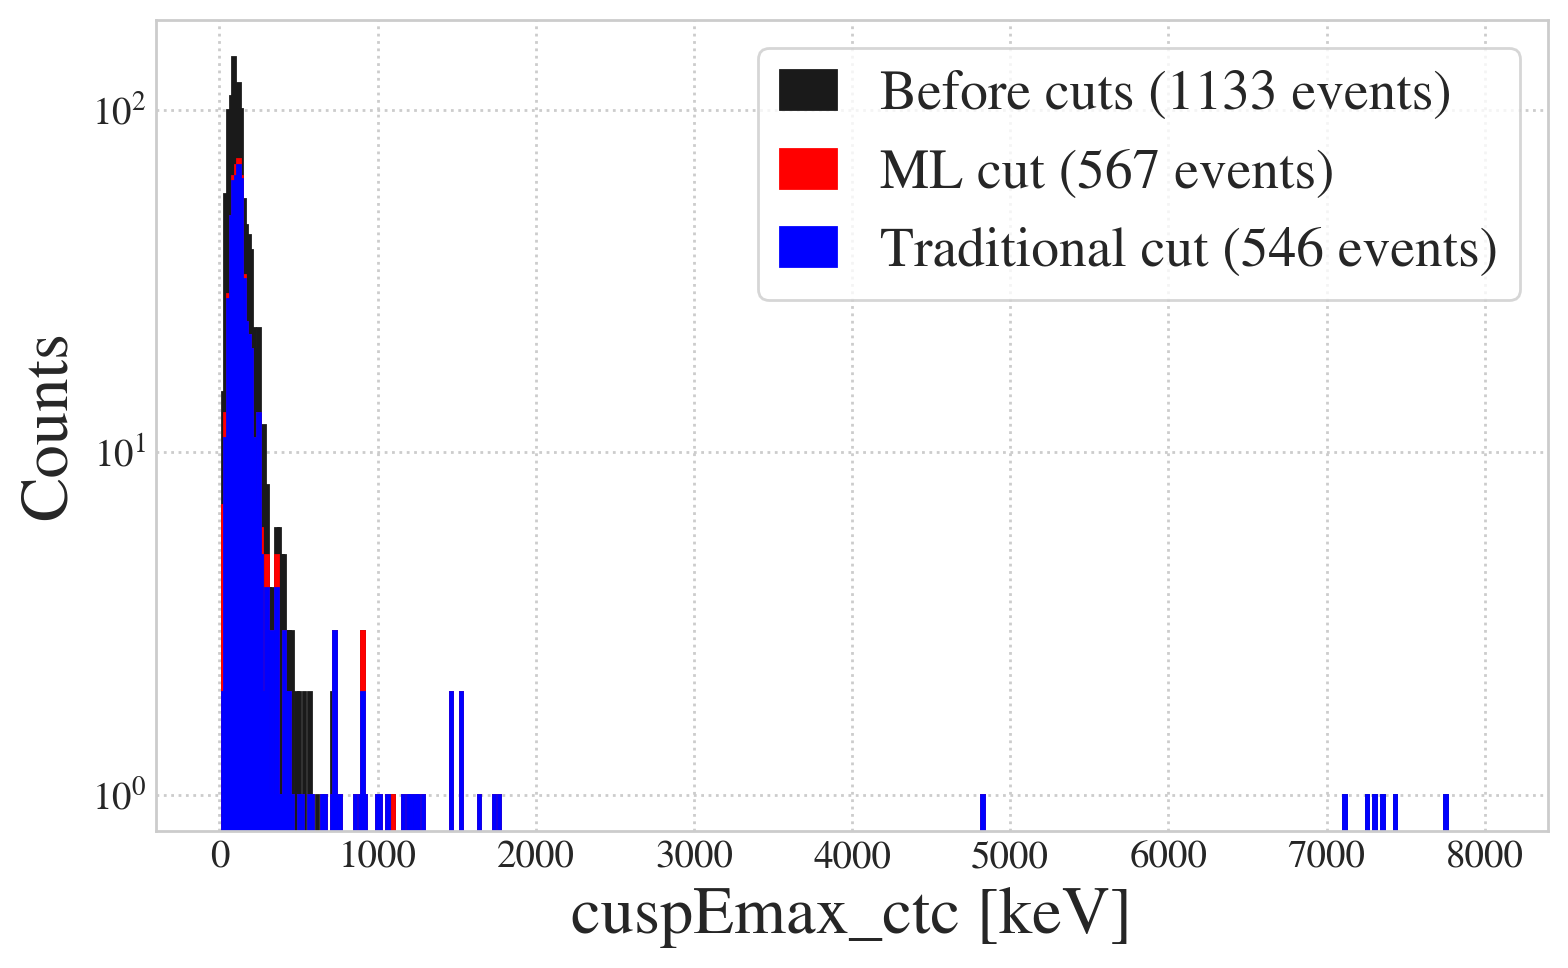

In [5]:

fig, ax = plt.subplots(1,1)

ax.hist(energy_thresh_cut, bins=500, range=(0,8000),
        label =f'Before cuts ({energy_thresh_cut.shape[0]} events)', color='k', ec="k")
ax.hist(energy_ml_cut, bins=500, range=(0,8000),
        label =f'ML cut ({energy_ml_cut.shape[0]} events)', color='red', ec="red", alpha = 1)
ax.hist(energy_trad_cut, bins=500, range=(0,8000), 
        label =f'Traditional cut ({energy_trad_cut.shape[0]} events)', color='blue', ec="blue", alpha = 1)


plt.xlabel('cuspEmax_ctc [keV]', fontsize=24)
plt.ylabel('Counts', fontsize=24)
plt.yscale('log')
plt.legend(loc='best', fontsize=20, fancybox=True)
plt.show()

Finally, we look at events that are kept/cut by both methods, those that are cut by one method but kept by the other, and vice versa. 

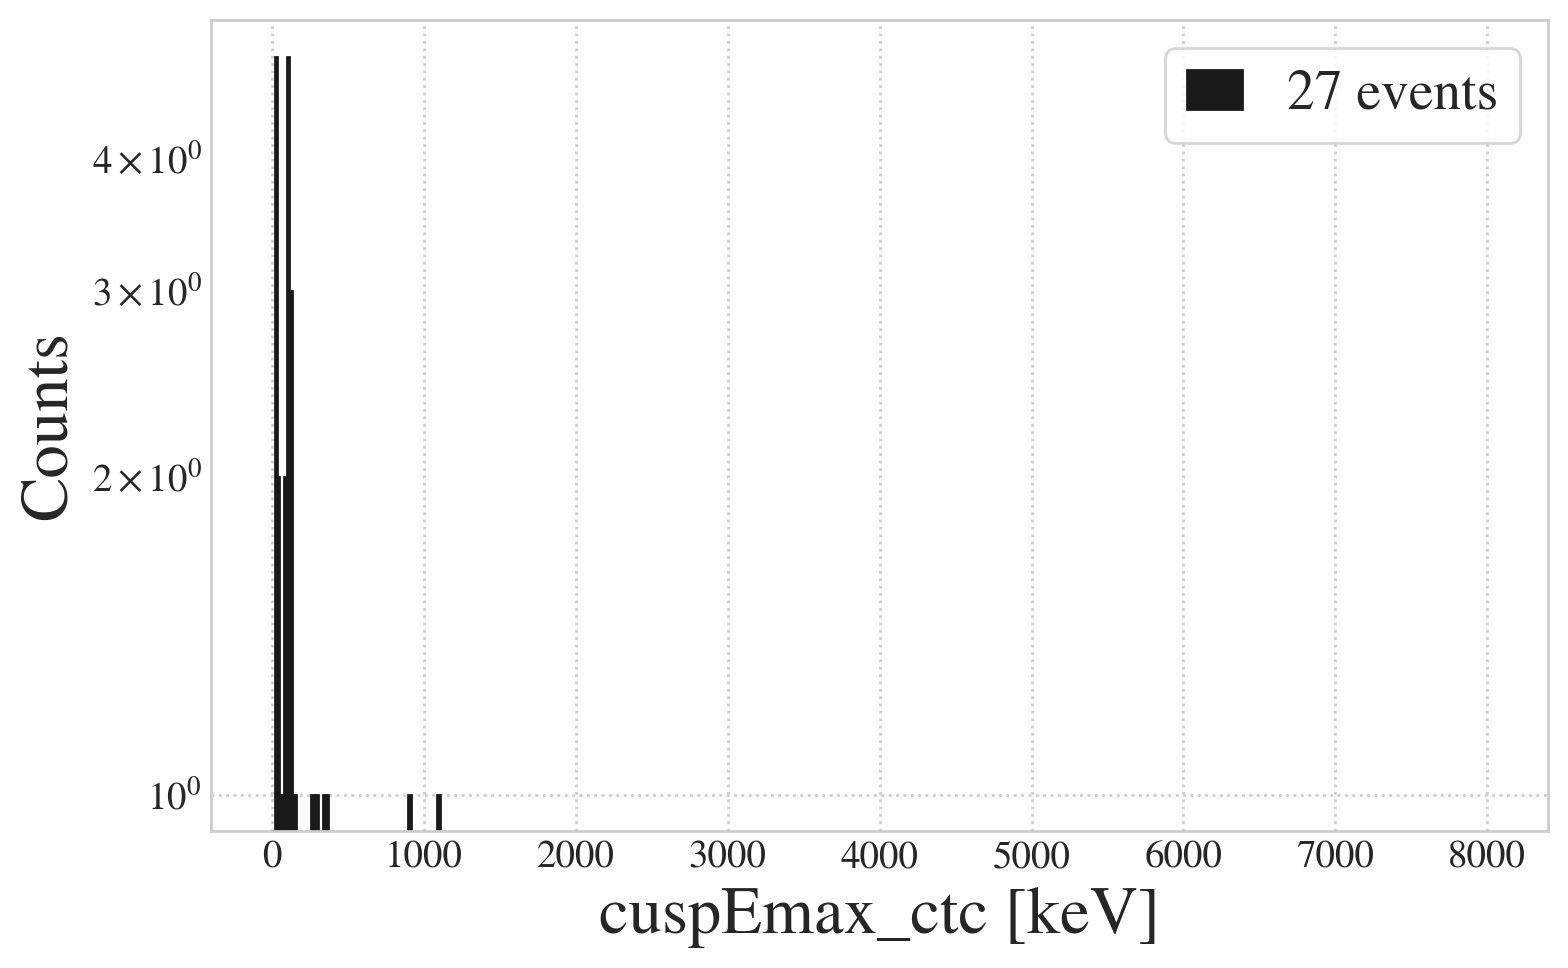

In [6]:
cut = ml_dc_cut & ~trad_dc_cut 

fig, ax = plt.subplots(1,1)
ax.hist(df['cuspEmax_ctc_cal'][cut], bins=500, range=(0,8000), \
        label =f'{df["cuspEmax_ctc_cal"][cut].shape[0]} events', color='k', ec="k")

plt.xlabel('cuspEmax_ctc [keV]', fontsize=24)
plt.ylabel('Counts', fontsize=24)
plt.yscale('log')
plt.legend(loc='best', fontsize=20, fancybox=True)
plt.show()

In [ ]:
print(df.svm_label.unique())
cut5 = ((df['svm_label'] == 9) )# & (df['cuspEmax_ctc_cal'] > 800) & (df['cuspEmax_ctc_cal'] < 1400))

In [17]:
label_cut = ((df['svm_label'] == 3) | (df['svm_label'] == 4)) 

nan
SVM label:4.0
Channel:3



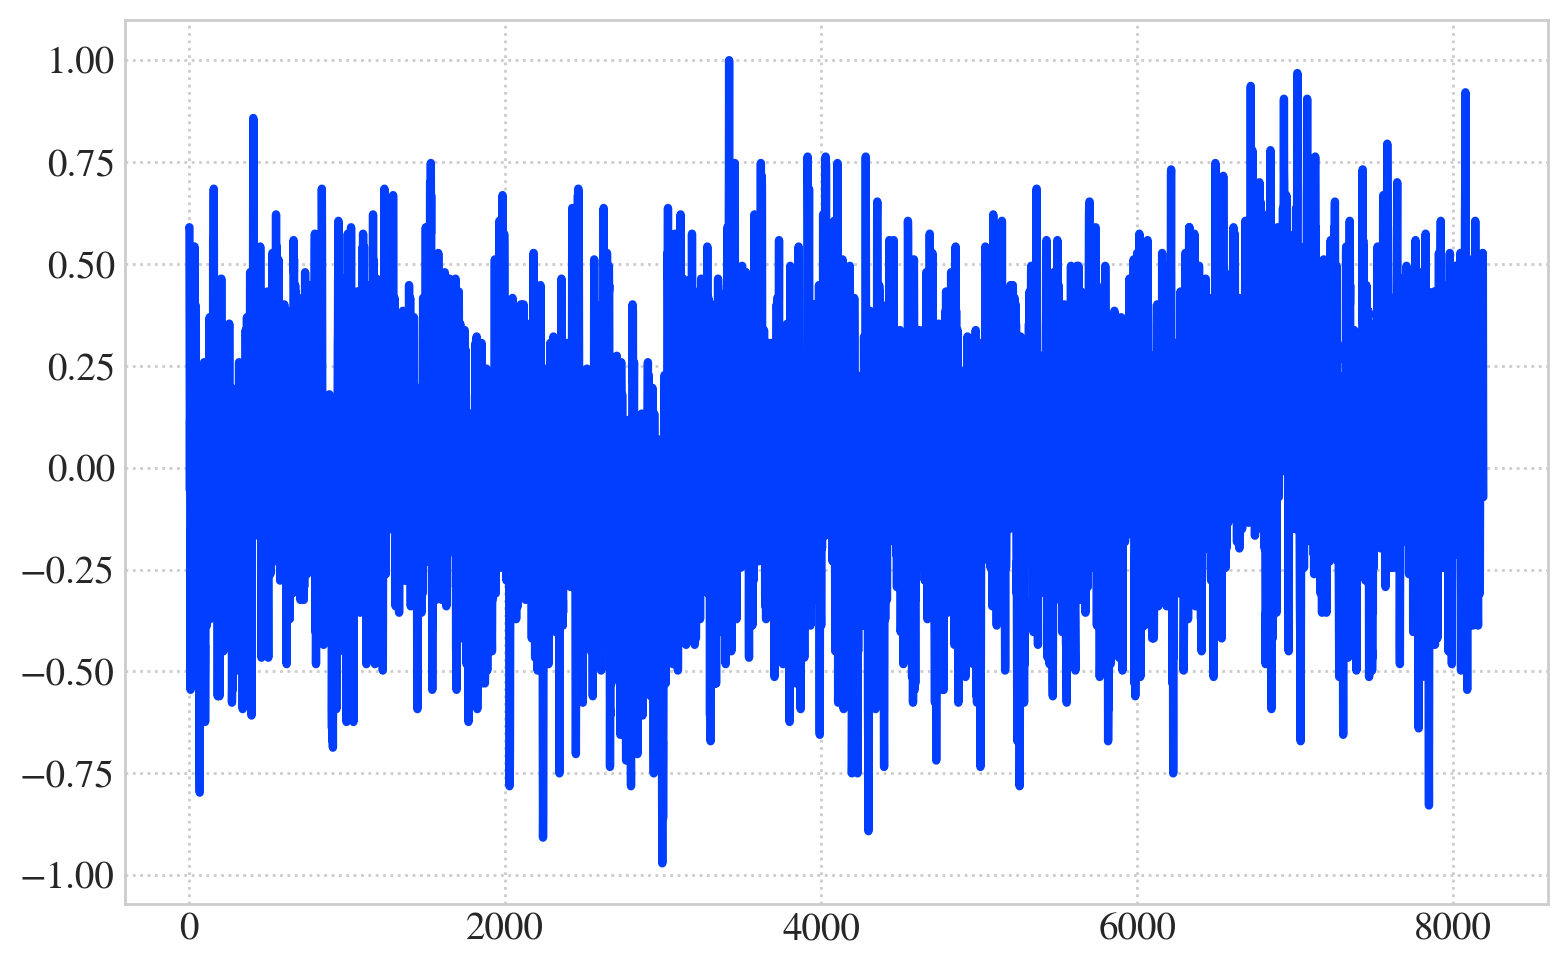

KeyboardInterrupt: Interrupted by user

In [18]:
# Look at waveforms within the desired cut
from IPython.display import display, clear_output

clear_output(wait=True)

samples = np.where(label_cut)[0]
print(f"number of waveforms {len(samples)}")
for i in samples[0:100]:
    print(Emax[i])
    print("SVM label:" + str(df.loc[i,'svm_label']))
    print("Channel:" + str(df.loc[i,'channel'])+ "\n")
    plt.plot(wf_norm[i])
    plt.show()
    a = input()
    if a == "":
        plt.close()
        clear_output()
        continue
    else:
        print("hit enter")
        clear_output()
print("end of samples")